In [1]:
import pandas as pd
import numpy as np
import re
import string
import time
from datetime import datetime
from datetime import date
import os

#Plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn import svm

In [2]:
# fileLocation = 'C:\\Users\\VictorY\\Desktop\\TestData\\stage3FinalProcessedDF_Nov-17-2019.csv'
fileLocation = 'C:\\Yuva\\ITU\\4th Sem\\Thesis\\Data\\cumulativeDirectorDF_Mar-21-2020.csv'
saveFileToPath = "C:\\Yuva\\ITU\\4th Sem\\Thesis\\Data"

data = pd.read_csv(fileLocation)

In [3]:
data.head()

,director_ids,director_name,movies_produced,Average_rating_value,Average_rating_count,career_Length,Gender,birthYear,primaryProfession,knownForTitles,CareerStartYear,median_inter_event_time,average_movie_per_year,average_inter_event_time
0,nm0000005,Ingmar Bergman,70,7.36,6984.76,63,Male,1918,"writer,director,actor","tt0083922,tt0069467,tt0050986,tt0050976",1946,1.0,1.11,0.9
1,nm0000008,Marlon Brando,1,7.20,7002.00,1,Male,1924,"actor,soundtrack,director","tt0047296,tt0078788,tt0070849,tt0068646",1961,0.0,1.00,0.0
2,nm0000009,Richard Burton,1,5.70,676.00,1,Male,1925,"actor,producer,soundtrack","tt0061184,tt0057877,tt0059749,tt0087803",1967,0.0,1.00,0.0
3,nm0000010,James Cagney,1,5.80,162.00,1,Male,1899,"actor,soundtrack,director","tt0055256,tt0035575,tt0029870,tt0031867",1957,0.0,1.00,0.0
4,nm0000018,Kirk Douglas,2,5.85,722.50,3,Male,1916,"actor,producer,soundtrack","tt0054331,tt0052365,tt0080736,tt0049456",1973,2.0,0.67,2.0


In [4]:
required_features_director_data = ['movies_produced',
                                   'Average_rating_value',
                                   'Average_rating_count',
                                   'career_Length',
                                   'Gender',
                                   'birthYear',
                                   'CareerStartYear',
                                   'average_movie_per_year',
                                   'median_inter_event_time',
                                   'average_inter_event_time'
                                  ]

In [5]:
# data = data.drop(columns=['director_ids', 'director_name','birthYear', 'deathYear', 'primaryProfession',
#        'knownForTitles', 'CareerStartYear',])

In [6]:
data = data[required_features_director_data]

In [7]:
print('The shape of our data is:', data.shape)

The shape of our data is: (41629, 10)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41629 entries, 0 to 41628
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   movies_produced           41629 non-null  int64  
 1   Average_rating_value      41629 non-null  float64
 2   Average_rating_count      41629 non-null  float64
 3   career_Length             41629 non-null  int64  
 4   Gender                    41629 non-null  object 
 5   birthYear                 41629 non-null  int64  
 6   CareerStartYear           41629 non-null  int64  
 7   average_movie_per_year    41629 non-null  float64
 8   median_inter_event_time   41629 non-null  float64
 9   average_inter_event_time  41629 non-null  float64
dtypes: float64(5), int64(4), object(1)
memory usage: 3.2+ MB


In [9]:
# Generic function to equally split the dataframe with respect to the column Name, in our case the Gender column.

def equal_split_on_columnName(nSampleEach, df,columnName='Gender'):
    df1 = pd.DataFrame()
    for i in df[columnName].value_counts().index:
        df1 = df1.append(df[(df[columnName]==i)].sample(n=nSampleEach,replace = False))        
    return df1.reset_index(drop=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41629 entries, 0 to 41628
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   movies_produced           41629 non-null  int64  
 1   Average_rating_value      41629 non-null  float64
 2   Average_rating_count      41629 non-null  float64
 3   career_Length             41629 non-null  int64  
 4   Gender                    41629 non-null  object 
 5   birthYear                 41629 non-null  int64  
 6   CareerStartYear           41629 non-null  int64  
 7   average_movie_per_year    41629 non-null  float64
 8   median_inter_event_time   41629 non-null  float64
 9   average_inter_event_time  41629 non-null  float64
dtypes: float64(5), int64(4), object(1)
memory usage: 3.2+ MB


In [11]:
# Run 1- Director Dataset - Equal and All data - SVM
model_features = ['movies_produced','Average_rating_value','Average_rating_count',
                  'career_Length','birthYear','CareerStartYear','average_movie_per_year',
                  'median_inter_event_time','average_inter_event_time']
model_comments = 'Run 1a - All data - SVM - Running with all features'
# model_comments = 'Run 1b - Equal data - Linear SVM - Running with all features'

In [12]:
temp = data.dropna(subset=model_features)

In [13]:
# temp = data.dropna(axis = 'index')
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41629 entries, 0 to 41628
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   movies_produced           41629 non-null  int64  
 1   Average_rating_value      41629 non-null  float64
 2   Average_rating_count      41629 non-null  float64
 3   career_Length             41629 non-null  int64  
 4   Gender                    41629 non-null  object 
 5   birthYear                 41629 non-null  int64  
 6   CareerStartYear           41629 non-null  int64  
 7   average_movie_per_year    41629 non-null  float64
 8   median_inter_event_time   41629 non-null  float64
 9   average_inter_event_time  41629 non-null  float64
dtypes: float64(5), int64(4), object(1)
memory usage: 3.5+ MB


In [14]:
equalGenderDF = equal_split_on_columnName(100,temp,"Gender")
equalGenderDF.head()

,movies_produced,Average_rating_value,Average_rating_count,career_Length,Gender,birthYear,CareerStartYear,average_movie_per_year,median_inter_event_time,average_inter_event_time
0,3,7.23,248.00,5,Male,1951,2009,0.60,2.0,2.00
1,5,7.28,29.00,4,Male,1982,2006,1.25,1.0,0.75
2,1,7.70,6.00,1,Male,1991,2016,1.00,0.0,0.00
3,2,8.75,7.00,3,Male,1954,2009,0.67,2.0,2.00
4,20,6.74,259.95,13,Male,1970,2004,1.54,0.0,0.63


# Stacked plots

In [15]:
mpl.style.use('ggplot')

In [16]:
data1 = temp.copy() 

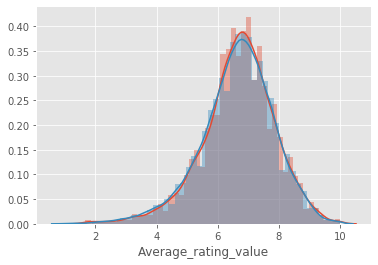

In [17]:
# Plot - Distribution of rating value among male and female. 

rating_value_Female = data1[(data1['Gender'] == 'Female')].Average_rating_value
rating_value_Male = data1[(data1['Gender'] == 'Male')].Average_rating_value

sns.distplot(rating_value_Female)
sns.distplot(rating_value_Male)

In [23]:
# Function to Plot - Distribution of rating value among male and female. 

def plot_features_WRT_gender(df,columnCriteriaName,columnFeatureName):
    dict={}
    for i in df[columnCriteriaName].value_counts().index:
        dict["{0}_{1}".format(columnFeatureName,i)] = df[(df[columnCriteriaName] == i)][columnFeatureName]
    for k,v in dict.items():
        sns.distplot(v,label=[k])
        plt.legend(bbox_to_anchor=(1.05, 0.6), loc=2, borderaxespad=0.)


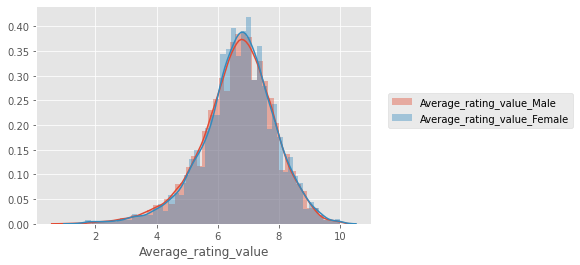

In [24]:
plot_features_WRT_gender(data1,"Gender","Average_rating_value")

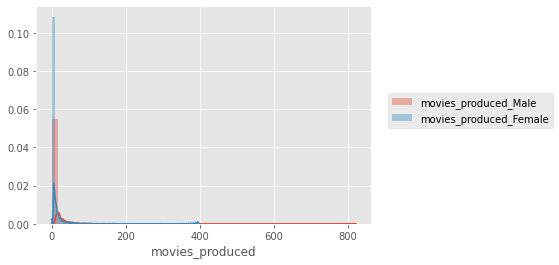

In [27]:
plot_features_WRT_gender(data1,"Gender","movies_produced")

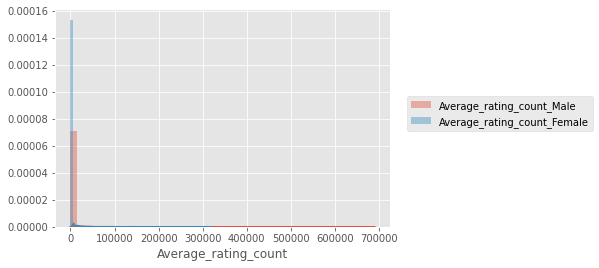

In [28]:
plot_features_WRT_gender(data1,"Gender","Average_rating_count")

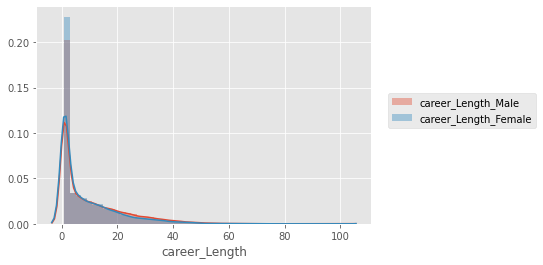

In [29]:
plot_features_WRT_gender(data1,"Gender","career_Length")

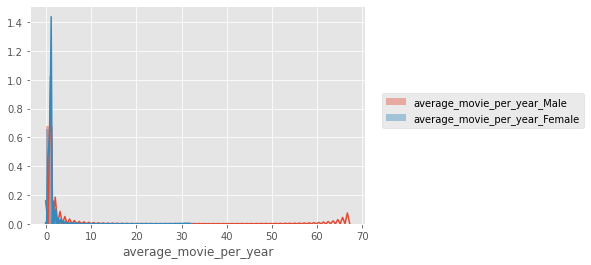

In [30]:
plot_features_WRT_gender(data1,"Gender","average_movie_per_year")

In [ ]:
df1 = data1.select_dtypes([np.int64, np.float64])
n=len(df1.columns)
fig,ax = plt.subplots(n,1, figsize=(6,n*2), sharex=False)
for i in range(n):
    plt.sca(ax[i])
    col = df1.columns[i]
    sns.distplot(df1[col].values)


In [ ]:
def plot_all_features_WRT_gender(df,columnCriteriaName,dataTypesToInclude):
    dict={}
    a = []
    for i in df[columnCriteriaName].value_counts().index:
        for columnFeatureName in df.select_dtypes(include=['int64','double']).columns:
            dict["{0}_{1}".format(columnFeatureName,i)] = df[(df[columnCriteriaName] == i)][columnFeatureName]
    for k,v in dict.items():
        plt.figure()
        sns.distplot(v)

In [ ]:
plot_all_features_WRT_gender(data1,"Gender",['int64','double'])

## Data pre-processing

In [ ]:
feature_names = temp.columns.values

In [ ]:
temp.Gender.value_counts()

In [ ]:
# divide the data into attributes and labels
X = temp.drop('Gender', axis=1)
y = temp['Gender']

In [ ]:
# # divide the data into attributes and labels
# X = equalGenderDF.drop('Gender', axis=1)
# y = equalGenderDF['Gender']

In [ ]:
# Divide the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
X_train.shape , X_test.shape

In [ ]:
# Training the model

start = time.time()

from sklearn.svm import SVC
linear_svclassifier = SVC(kernel='linear')
linear_svclassifier.fit(X_train, y_train)

# Stop timer
end = time.time()
print("Total time taken in minutes: " + str((end - start)/60))

In [ ]:
# Prediction based on the model trained
y_pred = linear_svclassifier.predict(X_test)

In [ ]:
# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(classification_report(y_test,y_pred))
(tn, fp, fn, tp)

In [ ]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()
    
# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features

f_importances(abs(linear_svclassifier.coef_[0]), feature_names)

In [ ]:
def print_feature_importances(coef, names, top=-1):
    whole = []
    imp = coef
    imp,names = zip(*sorted(list(zip(imp, names)),reverse=True))
    for i in range(len(names)):
        string = "{} :: {}".format(str(names[i]),str(round(imp[i],3)))
        whole.append(string)
    return whole

In [ ]:
print_feature_importances((linear_svclassifier.coef_[0]), feature_names)

In [ ]:
print_feature_importances(abs(linear_svclassifier.coef_[0]), feature_names)

In [ ]:
def svm_feature_importance(svclassifier,dfAttributes):
    feature_names = dfAttributes.columns.values
    for i in range(2):
        if(i==0):
            print("The plot with absolute contribution")
            pd.Series(abs(svclassifier.coef_[0]), index=feature_names).nlargest(8).plot(kind='barh')
            plt.show()
        elif(i==1):
            print("The plot with negative contribution")
            pd.Series((svclassifier.coef_[0]), index=feature_names).nlargest(8).plot(kind='barh')


In [ ]:
svm_feature_importance(linear_svclassifier,X)

### SVM -3 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

In [ ]:
# Initializing Classifiers
clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3],
                              weights=[2, 1, 1], voting='soft')

In [ ]:
# # Loading some example data
# X, y = iris_data()
# X = X[:,[0, 2]]

In [ ]:
y = y.values

In [ ]:
X = X.values

In [ ]:
# Plotting Decision Regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['Logistic Regression',
          'Random Forest',
          'RBF kernel SVM',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()

## Kernel SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# # equalGenderDF = equal_split_on_columnName(100,data,"Gender")

# # divide the data into attributes and labels
# X = equalGenderDF.drop('Gender', axis=1)
# y = equalGenderDF['Gender']

In [ ]:
temp

In [ ]:
temp.info()

In [ ]:
temp

In [ ]:
# divide the data into attributes and labels
X = temp.drop('Gender', axis=1)
y = temp['Gender']

In [ ]:
# Divide the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Polynomial Kernel

In [ ]:
poly_svclassifier = SVC(kernel='poly', degree=8)
poly_svclassifier.fit(X_train, y_train)
y_pred = poly_svclassifier.predict(X_test)

# Confusion Matrix  (tn, fp, fn, tp)
print(confusion_matrix(y_test, y_pred))

print("(tn, fp, fn, tp)",confusion_matrix(y_test, y_pred).ravel())
print(classification_report(y_test, y_pred))

## Gaussian kernel Classifier

In [ ]:
rbf_svclassifier = SVC(kernel='rbf')
rbf_svclassifier.fit(X_train, y_train)
y_pred = rbf_svclassifier.predict(X_test)

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Sigmoid kernel

In [ ]:
sigmoid_svclassifier = SVC(kernel='sigmoid')
sigmoid_svclassifier.fit(X_train, y_train)
y_pred = sigmoid_svclassifier.predict(X_test)

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))